# $\text{Exact diagonalization of the } 0 - \pi \text{ qubit Hamiltonian} - E \text{ } vs \text{ } \varphi_{ext}$

In [14]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [15]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [16]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

# Qubit parameters 1 

ng=0.5

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

#Qubit parameters 2 

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))

# For calculations
a=np.pi-(np.pi*0.01)
b=np.pi+(np.pi*0.01 + 0.001)
phi_ext=np.arange(a,b,(0.01*np.pi))
print(r"(1%) \epsilon_{\varphi} = ",(0.01*np.pi))
epsilon_phi=(0.01*np.pi)
print(phi_ext)

Energies=[]
Energies2=[]

(1%) \epsilon_{\varphi} =  0.031415926535897934
[3.11017673 3.14159265 3.17300858]


In [17]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n,phi,alph):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    H1=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=2*np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=EJ*np.kron(cos_theta,cos_phi.real)#SIN EL 2
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [18]:
# Calculations 1

for phi1 in phi_ext:
    print("Step for phi_ext = ",phi1)
    H=Hamiltonian_0pi(E_J,E_Cs,E_Cj,E_L,ng,phi1,alpha)
    print("Hamiltonian built, len(H)=",len(H)**2)
    #vals,vects=np.linalg.eigh(H)
    vals, _ = eigsh(H, k=2, which='SA')
    #vals,_=np.linalg.eigh(H)
    print(vals[0],vals[1])
    print("Eigenvalues calculated")
    Energies.append(vals)

Step for phi_ext =  3.1101767270538954
Hamiltonian built, len(H)= 4372281
1.7631782525583404 1.7807346115215805
Eigenvalues calculated
Step for phi_ext =  3.141592653589793
Hamiltonian built, len(H)= 4372281
1.7719316412969506 1.7719316412970338
Eigenvalues calculated
Step for phi_ext =  3.173008580125691
Hamiltonian built, len(H)= 4372281
1.763178252558283 1.7807346115217042
Eigenvalues calculated


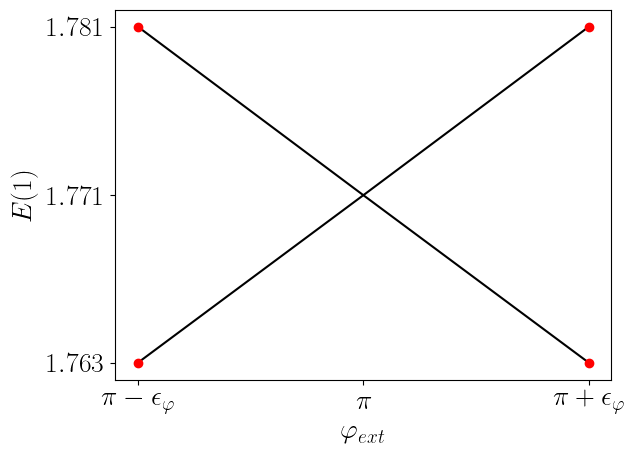

In [28]:
#Plot 1 
#Energiesphi = np.array(Energies)
#np.save('Energiesphi.npy', Energiesphi)
plt.plot(phi_ext,Energies,c="k")
plt.plot(np.pi-epsilon_phi,1.763178252558451, 'ro')
plt.plot(np.pi-epsilon_phi,1.780734611521542, 'ro')
plt.plot(np.pi+epsilon_phi,1.763178252558451 , 'ro')
plt.plot(np.pi+epsilon_phi,1.780734611521542, 'ro')
#plt.ylim(1.5,4.2)
plt.xlabel(r'$\varphi_{ext}$')
plt.ylabel('$E (1)$', labelpad=7.0)
plt.xticks([np.pi-epsilon_phi,np.pi,np.pi+epsilon_phi],[r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
plt.yticks([1.763178252558451,1.7719316405394376,1.780734611521542],[r"$1.763$",r"$1.771$",r"$1.781$"])
#plt.savefig('Energies_vs_phiext_M50N125_INTNO2.pdf')
plt.show()

## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [20]:
#Calculations 2 

for phi2 in phi_ext:
    print("Step for phi_ext = ",phi2)
    H2=Hamiltonian_0pi(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng,phi2,alpha2)
    print("Hamiltonian built, len(H)=",len(H2)**2)
    #vals2,vects2=np.linalg.eigh(H2)
    vals2, _ = eigsh(H2, k=2, which='SA')
    #vals2,_=np.linalg.eigh(H2)
    print(vals2[0],vals2[1])
    print("Eigenvalues calculated")
    Energies2.append(vals2)

Step for phi_ext =  3.1101767270538954
Hamiltonian built, len(H)= 4372281
0.27470737232472087 0.2755640770043979
Eigenvalues calculated
Step for phi_ext =  3.141592653589793
Hamiltonian built, len(H)= 4372281
0.2751351190432535 0.27513511904327026
Eigenvalues calculated
Step for phi_ext =  3.173008580125691
Hamiltonian built, len(H)= 4372281
0.27470737232474 0.2755640770044077
Eigenvalues calculated


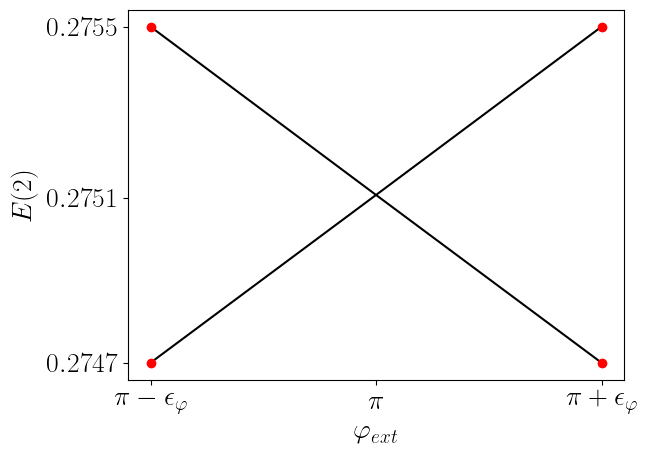

In [29]:
#Plot 2 
#Energies2phi = np.array(Energies2)
#np.save('Energies2phi.npy', Energies2phi)
plt.plot(phi_ext,Energies2,c="k")
#plt.ylim(0.25,0.7)
plt.plot(np.pi-epsilon_phi,0.2747073723247168, 'ro')
plt.plot(np.pi-epsilon_phi,0.2755640770043978, 'ro')
plt.plot(np.pi+epsilon_phi,0.2747073723247168 , 'ro')
plt.plot(np.pi+epsilon_phi,0.2755640770043978, 'ro')
plt.xlabel(r'$\varphi_{ext}$')
plt.ylabel('$E (2)$',labelpad=7.0)
plt.xticks([np.pi-epsilon_phi,np.pi,np.pi+epsilon_phi],[r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
plt.yticks([0.2747073723247168,0.2751284142050462,0.2755640770043978],[r"$0.2747$",r"$0.2751$",r"$0.2755$"])
#plt.savefig('Energies2_vs_phiext_M50N125_INTNO2.pdf')
plt.show()